# 🧠 Heart Disease ML Project - Notebook 3: Feature Selection

In this notebook, we apply multiple feature selection techniques to identify the most informative features for model training:

- 🌲 Random Forest Feature Importance  
- 🔁 Recursive Feature Elimination (RFE)  
- 📊 Chi-Square Test (for binary categorical features)  
- 📦 Combine and save selected features for training

---

## 📦 1. Import Required Libraries


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, SelectKBest, chi2
import joblib

## 📥 2. Load Preprocessed Data


In [10]:
X_train = pd.read_csv('/content/heart_disease_train.csv')
X_test = pd.read_csv('/content/heart_disease_test.csv')
y_train = pd.read_csv('/content/heart_disease_train_target.csv')
y_test = pd.read_csv('/content/heart_disease_test_target.csv')

## ⚙️ 3. Prepare Feature Lists


In [11]:
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = [col for col in X_train.columns if col not in numerical_cols]

## 🌲 4. Random Forest Feature Importance


✅ Computing Random Forest Feature Importance...


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/tmp/ipython-input-12-3780511967.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-12-3780511967.py:15: UserWarning:

Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.

/tmp/ipython-input-12-3780511967.py:16: UserWarning:

Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.



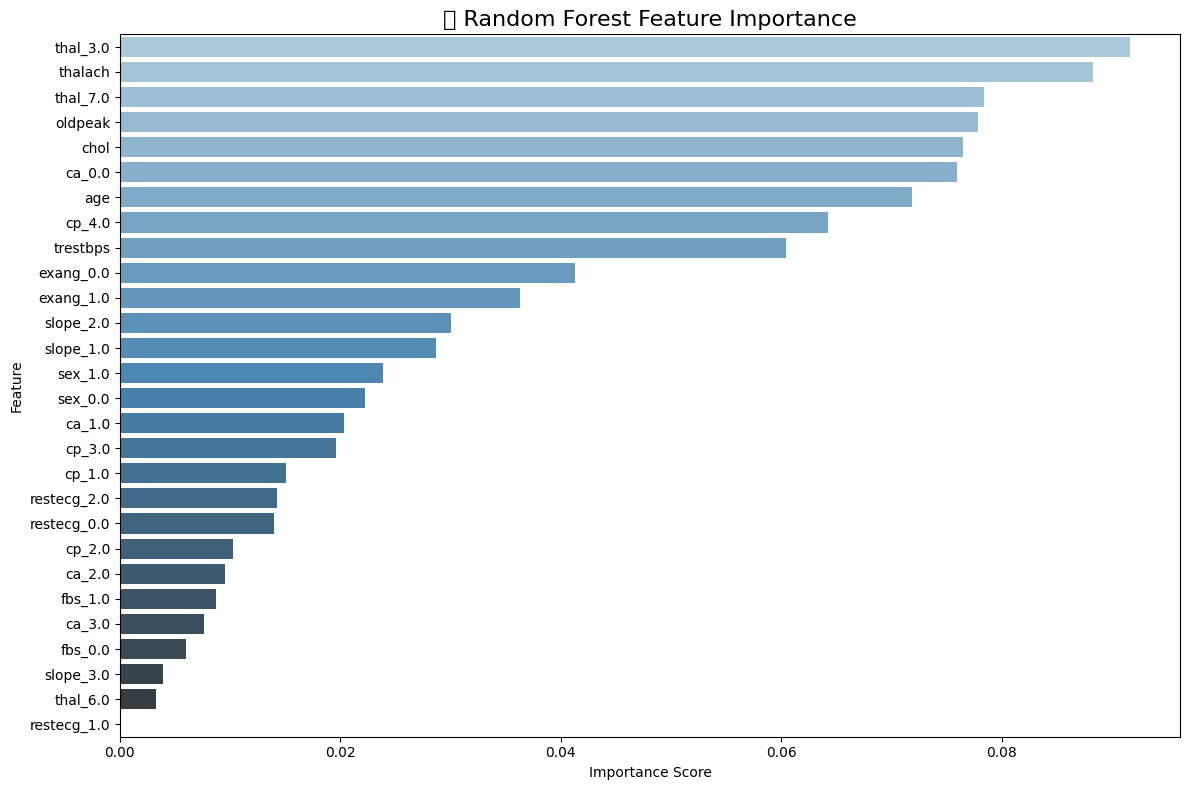

In [12]:
print("✅ Computing Random Forest Feature Importance...")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='Blues_d')
plt.title('🌲 Random Forest Feature Importance', fontsize=16)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

## 🔁 5. Recursive Feature Elimination (RFE)

In [17]:
print("✅ Running RFE (Recursive Feature Elimination)...")
rfe_model = RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=10)
rfe_model.fit(X_train, y_train)

selected_rfe = X_train.columns[rfe_model.support_].tolist()
print("📌 Selected features by RFE:", selected_rfe)

✅ Running RFE (Recursive Feature Elimination)...
📌 Selected features by RFE: ['sex_0.0', 'sex_1.0', 'cp_4.0', 'exang_0.0', 'slope_1.0', 'slope_2.0', 'ca_0.0', 'ca_3.0', 'thal_3.0', 'thal_7.0']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408

## 📊 6. Chi-Square Test for Binary Categorical Features


In [14]:
print("✅ Running Chi-Square Test on categorical features...")

chi2_features = [col for col in X_train.columns if col in categorical_features and X_train[col].nunique() <= 2]

if chi2_features:
    chi2_selector = SelectKBest(chi2, k=min(10, len(chi2_features)))
    chi2_selector.fit(X_train[chi2_features], y_train)
    selected_chi2 = np.array(chi2_features)[chi2_selector.get_support()].tolist()
    print("📌 Selected features by Chi-Square:", selected_chi2)
else:
    selected_chi2 = []
    print("⚠️ No suitable features found for Chi-Square test.")

✅ Running Chi-Square Test on categorical features...
📌 Selected features by Chi-Square: ['sex_0.0', 'cp_2.0', 'cp_4.0', 'exang_0.0', 'exang_1.0', 'slope_1.0', 'slope_2.0', 'ca_0.0', 'thal_3.0', 'thal_7.0']


## 🔗 7. Combine Selected Features from All Methods


In [15]:
print("🔗 Combining selected features from all methods...")

# Top N from Random Forest
top_n = 10
top_rf_features = feature_importance['Feature'].head(top_n).tolist()

# Combine unique features from all methods
final_features = list(set(selected_rfe + selected_chi2 + top_rf_features))
print(f"✅ Final selected features ({len(final_features)} total): {final_features}")

🔗 Combining selected features from all methods...
✅ Final selected features (17 total): ['slope_2.0', 'ca_3.0', 'sex_1.0', 'thal_3.0', 'age', 'oldpeak', 'chol', 'exang_0.0', 'exang_1.0', 'thalach', 'thal_7.0', 'cp_2.0', 'slope_1.0', 'ca_0.0', 'sex_0.0', 'cp_4.0', 'trestbps']


## 💾 8. Filter and Save Selected Features


In [16]:
X_train_selected = X_train[final_features]
X_test_selected = X_test[final_features]

joblib.dump(final_features, 'selected_features.pkl')
print("💾 Selected feature list saved as 'selected_features.pkl'")

💾 Selected feature list saved as 'selected_features.pkl'
